In [5]:
"""缺失数据的处理"""

'缺失数据的处理'

In [6]:
import pandas as pd
from io import StringIO
csv_data = """A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,"""
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [7]:
df.isnull().sum() # 显示每列的缺失值

A    0
B    0
C    1
D    1
dtype: int64

In [8]:
df.dropna() # 删除有空值的行

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(axis=1) # 删除有空值的列

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [10]:
df.dropna(how='all') #只删除全为空的行

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [11]:
df.dropna(thresh=4) #只删除非空缺值小于4的行

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [12]:
df.dropna(subset=['C']) #只删除C列为空的行

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [13]:
from sklearn.preprocessing import Imputer #均值填充
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [14]:
"""处理类别数据"""

'处理类别数据'

In [52]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                  ['red', 'L', '13.5', 'class2'],
                  ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [16]:
# 有序特征的映射(特征是可以排序的)
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [17]:
inv_size_mapping = {v:k for k, v in size_mapping.items()}

In [18]:
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [19]:
"""类标的编码"""

'类标的编码'

In [20]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [21]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [53]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(np.unique(df['classlabel'].values)) # 使用sklearn完成对类标的编码
y

array([0, 1])

In [54]:
class_le.inverse_transform(np.unique(y))

/home/liuchao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2'], dtype=object)

In [24]:
class_le.classes_

array([0, 1])

In [25]:
# 标称特征的独热编码
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,1] = color_le.fit_transform(X[:,1])
X[:,0] = color_le.fit_transform(X[:,0])
# X # 算法假定red > green > blue

In [26]:
X

array([[1, 1, 10.1],
       [2, 0, '13.5'],
       [0, 2, 15.3]], dtype=object)

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0],sparse=False) # 将某列转换为独热编码，注意数据中不能有任何字符串
ohe.fit_transform(X)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  0. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

In [28]:
"""将数据集划分为训练集和测试集"""

'将数据集划分为训练集和测试集'

In [29]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                  'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [30]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
"""将特征缩放到相同的区间"""

'将特征缩放到相同的区间'

In [33]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [34]:
# 标准化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [35]:
"""选择有意义的特征"""

'选择有意义的特征'

In [36]:
# L1正则化
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.5)  # C为正则化系数的倒数
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


In [37]:
lr.intercept_ # 截距（b）

array([-1.13632544, -0.97511988, -1.62582478])

In [38]:
lr.coef_ # 权向量（稀疏矩阵）

array([[ 0.97133458,  0.        ,  0.34147624, -0.77164436,  0.        ,
         0.        ,  0.84819156,  0.        ,  0.        ,  0.        ,
         0.        ,  0.60369016,  1.76362068],
       [-0.88287072, -0.42019954, -0.59245819,  0.20868289,  0.        ,
         0.        ,  0.        ,  0.        ,  0.31715774, -1.72515494,
         0.76660979,  0.        , -1.58303851],
       [ 0.        ,  0.223786  ,  0.20104436,  0.        ,  0.        ,
         0.        , -1.61192735,  0.        ,  0.        ,  1.44326548,
        -0.56044701, -0.73118574,  0.        ]])

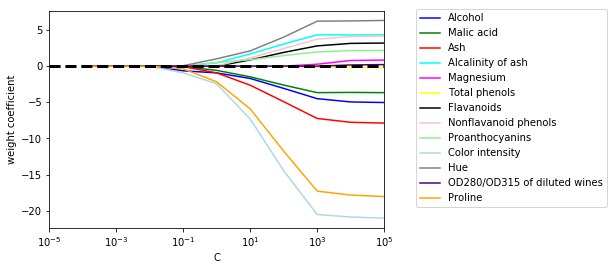

In [39]:
# 权重系数受正则化参数的影响
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray',
         'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**float(c), random_state=0) # power to float!
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**float(c))
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3) # horizon水平
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [40]:
"""序列特征选择算法"""
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size = 0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1): # 生成器，返回indices的r子集
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)  # 返回最大值的索引
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [42]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

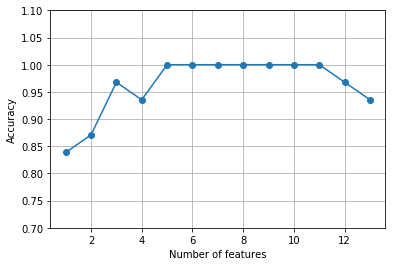

In [43]:
# 准确度随特征数量的变化
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [44]:
k5 = list(sbs.subsets_[8]) # 最佳的5个特征
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [48]:
"""利用随机森林得到特征重要程度"""
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # 从大到小
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


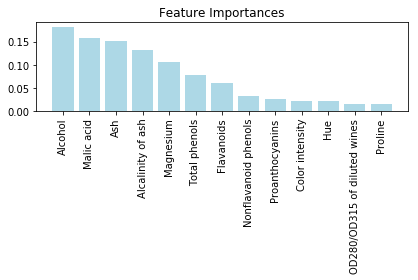

In [49]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()